Este notebook é para investigar os efeitos do ruído aditivo gaussiano em uma imagem. A ideia é que ruídos com a mesma variância podem impactar imagens de maneiras diferentes, dependendo da qualidade da imagem.


Pegar uma imagem grande, fazer versões comprimidas dela de tamanhos diferentes (pode ser só P, M e G). Pegar estatísticas resumo das imagens e ver como elas mudam (visualmente) de acordo com diferentes níveis de ruído.


**Imports iniciais**

In [0]:
from sklearn.datasets import fetch_lfw_people
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
import seaborn as sns
import numpy as np
import math
import pandas as pd
import statistics
import scipy

In [0]:
# Função que adiciona ruído às imagens
def add_noise(sigma, bw_img):
    """Adiciona ruído a uma imagem em escala de cinza com valores entre 0 e 1"""
    sh = bw_img.shape
    noise = np.random.normal(0, sigma, sh)
    newgray = bw_img + noise
    #np.clip(newgray, 0, 1) # quando faço isso ela deixa de ser normal!!!
    # vou parar de clipar.
    return newgray

# Função que transforma imagem em preto e branco
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

**Importando imagem do Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
im = imread("/content/gdrive/My Drive/Colab_Notebooks/autumn-goodman.jpg") # 3648 x 5472
im2 = imread("/content/gdrive/My Drive/Colab_Notebooks/apple.jpg") # 900 x 900
im3 = imread("/content/gdrive/My Drive/Colab_Notebooks/blackhole.jpg") # 225 x 225
im4 = imread("/content/gdrive/My Drive/Colab_Notebooks/petermcnamee.jpg") # 256 x 256

**Normalizando imagem**

In [0]:
gray = rgb2gray(im) # Passa para escala de cinza
valormaximo = np.amax(gray)
gray = gray/valormaximo # Deixa entre 0 e 1

In [0]:
# Normalizando as outras imagens
gray2 = rgb2gray(im2) # Passa para escala de cinza
valormaximo = np.amax(gray2)
gray2 = gray2/valormaximo # Deixa entre 0 e 1
gray3 = rgb2gray(im3) # Passa para escala de cinza
valormaximo = np.amax(gray3)
gray3 = gray3/valormaximo # Deixa entre 0 e 1
gray4 = rgb2gray(im4) # Passa para escala de cinza
valormaximo = np.amax(gray4)
gray4 = gray4/valormaximo # Deixa entre 0 e 1




**Características das imagens**

Imagem 1
Tamanho: 3648x5472
Média dos valores dos pixels: 0.7194544569863892
Mediana dos valores dos pixels: 0.8064874108213032
Desvio padrão dos valores dos pixels: 0.19287252505657432
Outras estatísticas: 
DescribeResult(nobs=19961856, minmax=(0.000900425925158019, 1.0), mean=0.7194544569863892, variance=0.037199812785243674, skewness=-1.6004862999363054, kurtosis=1.545219032659495)

----------
Imagem 2
Tamanho: 900x900
Média dos valores dos pixels: 0.48615216255389215
Mediana dos valores dos pixels: 0.46535722149852554
Desvio padrão dos valores dos pixels: 0.18117411789111013
Outras estatísticas: 
DescribeResult(nobs=810000, minmax=(0.03945498434962989, 1.0), mean=0.48615216255389215, variance=0.03282410151720399, skewness=0.21520179433233438, kurtosis=-0.5644308589681399)

----------
Imagem 3
Tamanho: 225x225
Média dos valores dos pixels: 0.2338078346009377
Mediana dos valores dos pixels: 0.12947961462812949
Desvio padrão dos valores dos pixels: 0.25465108264925074
Outras estatísti

Text(0.5, 1.0, 'Imagem 4')

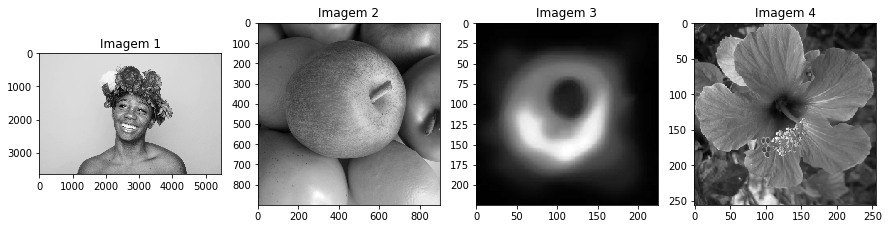

In [0]:
print("Imagem 1")
print(f"Tamanho: {gray.shape[0]}x{gray.shape[1]}")
print(f"Média dos valores dos pixels: {np.mean(gray)}")
print(f"Mediana dos valores dos pixels: {np.median(gray)}")
print(f"Desvio padrão dos valores dos pixels: {np.std(gray)}")
print(f"Outras estatísticas: \n{scipy.stats.describe(gray.flatten())}")

print("\n----------")
print("Imagem 2")
print(f"Tamanho: {gray2.shape[0]}x{gray2.shape[1]}")
print(f"Média dos valores dos pixels: {np.mean(gray2)}")
print(f"Mediana dos valores dos pixels: {np.median(gray2)}")
print(f"Desvio padrão dos valores dos pixels: {np.std(gray2)}")
print(f"Outras estatísticas: \n{scipy.stats.describe(gray2.flatten())}")

print("\n----------")
print("Imagem 3")
print(f"Tamanho: {gray3.shape[0]}x{gray3.shape[1]}")
print(f"Média dos valores dos pixels: {np.mean(gray3)}")
print(f"Mediana dos valores dos pixels: {np.median(gray3)}")
print(f"Desvio padrão dos valores dos pixels: {np.std(gray3)}")
print(f"Outras estatísticas: \n{scipy.stats.describe(gray3.flatten())}")

print("\n----------")
print("Imagem 4")
print(f"Tamanho: {gray4.shape[0]}x{gray4.shape[1]}")
print(f"Média dos valores dos pixels: {np.mean(gray4)}")
print(f"Mediana dos valores dos pixels: {np.median(gray4)}")
print(f"Desvio padrão dos valores dos pixels: {np.std(gray4)}")
print(f"Outras estatísticas: \n{scipy.stats.describe(gray4.flatten())}")

### Imagens
figures, axes = plt.subplots(1, 4, figsize=(15,15))
axes[0].imshow(gray, cmap='gray')
axes[0].set_title('Imagem 1')
axes[1].imshow(gray2, cmap='gray')
axes[1].set_title('Imagem 2')
axes[2].imshow(gray3, cmap='gray')
axes[2].set_title('Imagem 3')
axes[3].imshow(gray4, cmap='gray')
axes[3].set_title('Imagem 4')


In [0]:
scipy.stats.kurtosistest(gray.flatten())
scipy.stats.skewtest(gray.flatten())

SkewtestResult(statistic=-2123.2632470378935, pvalue=0.0)

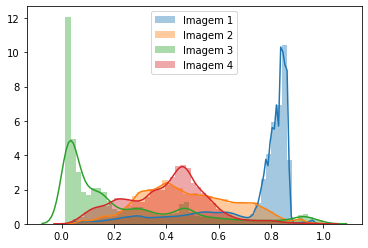

<Figure size 432x288 with 0 Axes>

In [0]:
# Histogramas

sns.distplot(gray.flatten(), label = "Imagem 1")
sns.distplot(gray2.flatten(), label = "Imagem 2")
sns.distplot(gray3.flatten(), label = "Imagem 3")
sns.distplot(gray4.flatten(), label = "Imagem 4")
plt.legend()
plt.show()

# plt.savefig('asd.png', dpi = 200) # nao tá salvando nada


**Adicionando diferentes níveis de ruído à imagem grande (Imagem 1)**

In [0]:
# Criar listas de sigmas que quer testar
sigma_list = (0.01, 0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1, 2, 3)
sigma_list = np.linspace(0.01, 0.2, 5)


quantos_sigmas = len(sigma_list)
x = [0 for x in range(quantos_sigmas)]

In [0]:
for i in range(quantos_sigmas):
  x[i] = add_noise(sigma_list[i], gray)

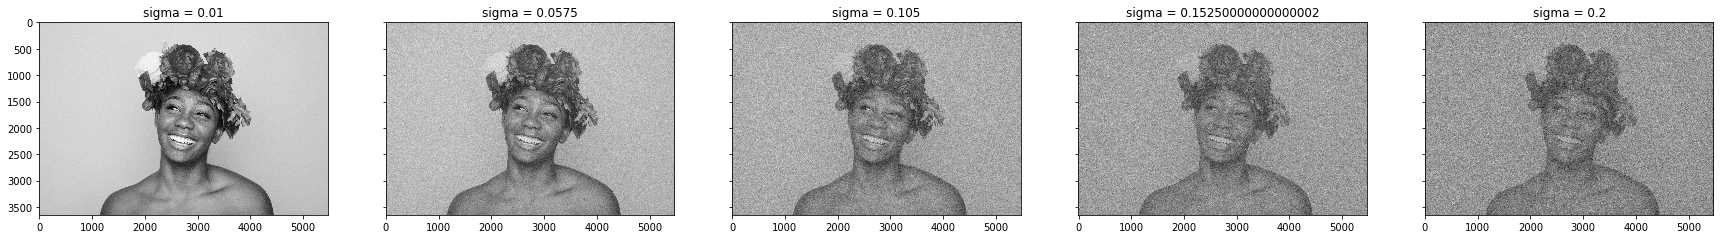

In [0]:
figures, axes = plt.subplots(1, quantos_sigmas, sharex=True, sharey=True, figsize=(30,30))
for i in range(quantos_sigmas):
  axes[i].imshow(x[i], cmap='gray')
  axes[i].set_title(f"sigma = {sigma_list[i]}")
  

**Fazendo o mesmo para as outras imagens**

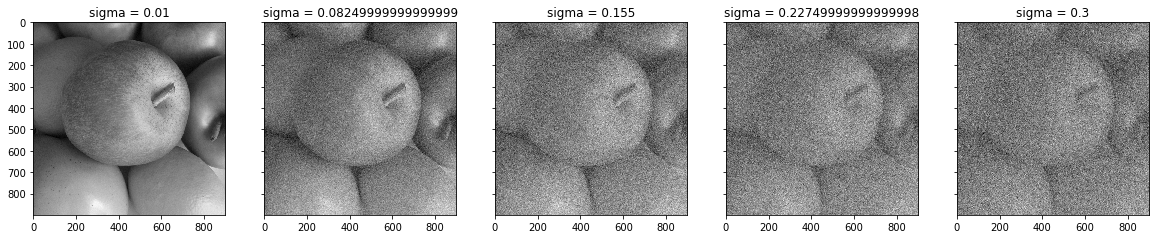

In [0]:
# Criar listas de sigmas que quer testar
#sigma_list = (0.01, 0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1, 2, 3) # Essa img já começa a desaparecer com sigma 0.5
sigma_list = np.linspace(0.01, 0.3, 5)


quantos_sigmas = len(sigma_list)
x = [0 for x in range(quantos_sigmas)]

for i in range(quantos_sigmas):
  x[i] = add_noise(sigma_list[i], gray2)

figures, axes = plt.subplots(1, quantos_sigmas, sharex=True, sharey=True, figsize=(20,20))
for i in range(quantos_sigmas):
  axes[i].imshow(x[i], cmap='gray')
  axes[i].set_title(f"sigma = {sigma_list[i]}")

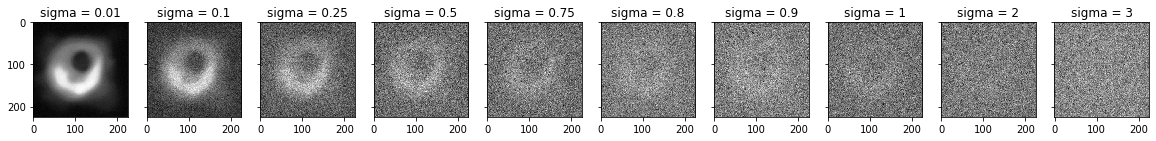

In [0]:
# Criar listas de sigmas que quer testar
sigma_list = (0.01, 0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1, 2, 3) # Essa img já começa a desaparecer com sigma 1
#sigma_list = np.linspace(0.01, 0.3, 5)


quantos_sigmas = len(sigma_list)
x = [0 for x in range(quantos_sigmas)]

for i in range(quantos_sigmas):
  x[i] = add_noise(sigma_list[i], gray3)

figures, axes = plt.subplots(1, quantos_sigmas, sharex=True, sharey=True, figsize=(20,20))
for i in range(quantos_sigmas):
  axes[i].imshow(x[i], cmap='gray')
  axes[i].set_title(f"sigma = {sigma_list[i]}")

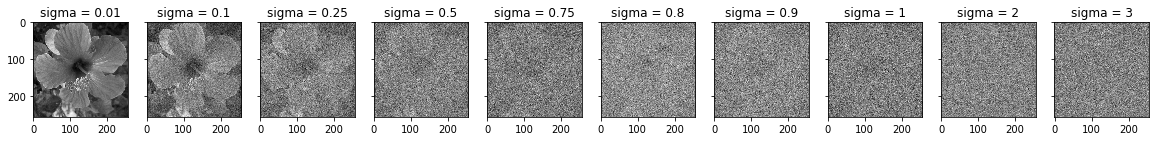

In [0]:
# Criar listas de sigmas que quer testar
sigma_list = (0.01, 0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 1, 2, 3) # Essa img já começa a desaparecer com sigma 0.25
#sigma_list = np.linspace(0.01, 0.3, 5)


quantos_sigmas = len(sigma_list)
x = [0 for x in range(quantos_sigmas)]

for i in range(quantos_sigmas):
  x[i] = add_noise(sigma_list[i], gray4)

figures, axes = plt.subplots(1, quantos_sigmas, sharex=True, sharey=True, figsize=(20,20))
for i in range(quantos_sigmas):
  axes[i].imshow(x[i], cmap='gray')
  axes[i].set_title(f"sigma = {sigma_list[i]}")

A imagem 3, que tem contraste muito alto, e muitos pixels perto de 0, é muito mais robusta.

falta calcular outras métricas para ver como elas mudam de acordo com o ruído.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


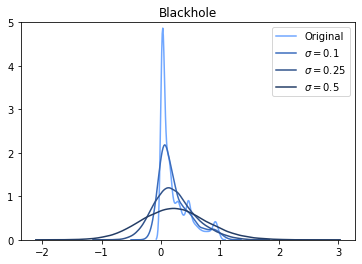

In [42]:
sns.distplot(gray3.flatten(), label = "Original", color = '#70a7ff', hist = False).set_title('Blackhole')
sns.distplot(add_noise(0.1, gray3).flatten(), label = r'$\sigma=0.1$', color = '#3a6cbd', hist = False)
sns.distplot(add_noise(0.25, gray3).flatten(), label = r'$\sigma=0.25$', color='#30528a', hist = False)
sns.distplot(add_noise(0.5, gray3).flatten(), label = r'$\sigma=0.5$', color= '#243d66', hist = False)
ax = plt.axes()
ax.set_ylim(0, 5)
plt.legend()
plt.show()